In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

In [3]:
reeses = cv2.imread('course/DATA/reeses_puffs.png', 0)

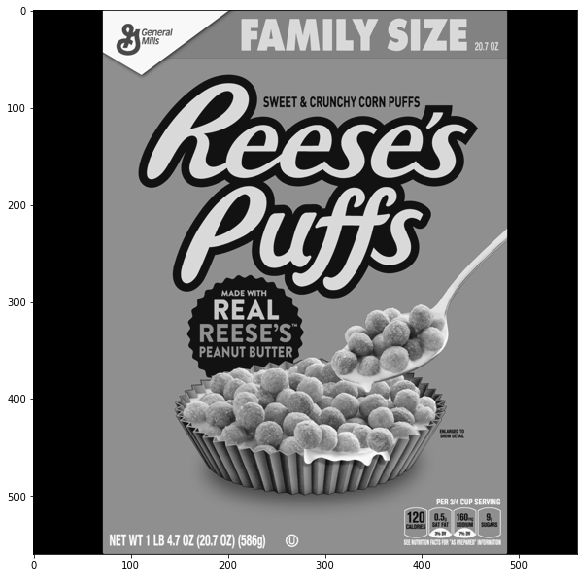

In [4]:
display(reeses)

In [5]:
cereals = cv2.imread('course/DATA/many_cereals.jpg', 0)

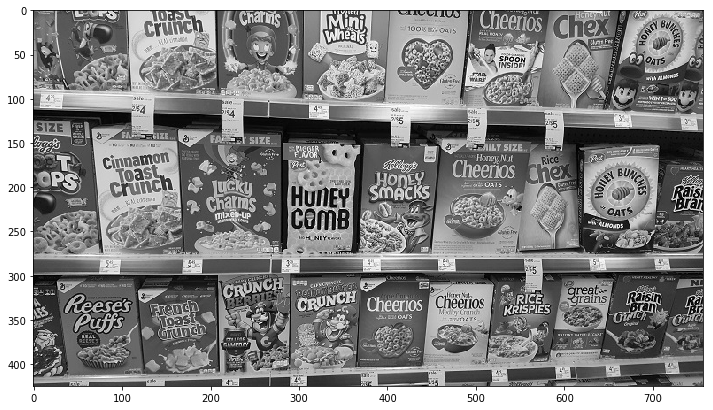

In [6]:
display(cereals)

In [7]:
orb = cv2.ORB_create()

In [8]:
# keypoint: are spatial locations or points in the image that define what is interesting or stand out in the image (scale invariant)
# descriptor: the way we describe keypoint. Use descriptor if we need to match the keypoints between the images
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

In [9]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [10]:
matches = bf.match(des1, des2)

In [11]:
single_match = matches[0]

In [12]:
single_match.distance

69.0

In [13]:
matches = sorted(matches, key=lambda x: x.distance)

In [14]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

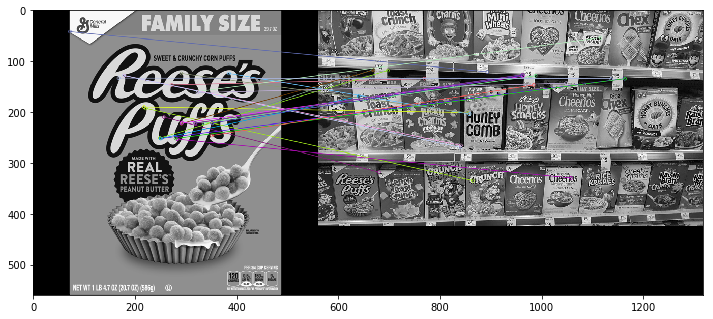

In [15]:
display(reeses_matches)

## SIFT

In [16]:
sift = cv2.xfeatures2d.SIFT_create()

In [17]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [18]:
bf = cv2.BFMatcher()

In [19]:
des1

array([[ 15.,   0.,   0., ...,  11.,   1.,   0.],
       [ 21.,   0.,   0., ...,   0.,  10.,  13.],
       [150.,   1.,   0., ...,   0.,   0.,   0.],
       ...,
       [ 61.,   6.,   0., ...,   0.,   0.,   0.],
       [ 27.,   0.,   0., ...,   0.,   0.,   0.],
       [ 48.,   0.,   0., ...,   0.,   1.,   0.]], dtype=float32)

In [20]:
matches = bf.knnMatch(des1, des2, k=2)

In [21]:
good = []

for match1, match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

In [22]:
print(len(good), len(matches))

78 1500


In [23]:
reeses_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

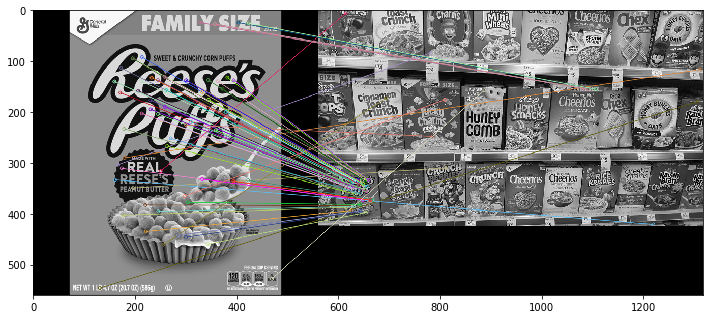

In [24]:
display(reeses_matches)

## FLANN

In [40]:
sift = cv2.xfeatures2d.SIFT_create()

In [41]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [42]:
# FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [43]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [44]:
matches = flann.knnMatch(des1, des2, k=2)

In [45]:
matchesMask = [[0, 0] for i in range(len(matches))]

In [46]:
# good = []

for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.75 * match2.distance:
#         good.append([match1])
        matchesMask[i] = [1, 0]

In [47]:
draw_params = dict(matchColor=(0,255,0),
                  singlePointColor=(255,0,0),
                  matchesMask=matchesMask,
                  flags=0)

In [49]:
# reeses_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, **draw_params)
reeses_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)

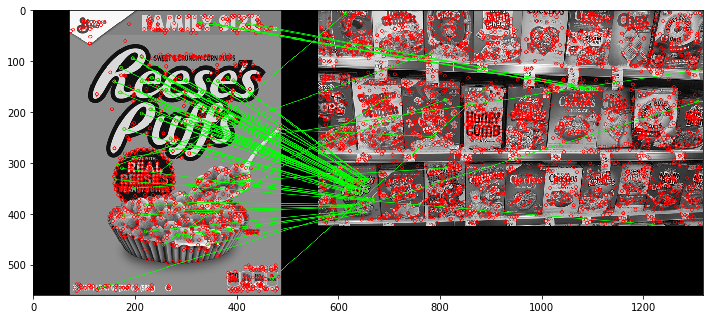

In [50]:
display(reeses_matches)